## Data_Visualization_And_Preprocessing

Make a csv copy after each step to compare different feature selection methods

> 1. Drop all non numeric data 
> 2. Drop feature containing '$' in the first position
> 3. Drop all constant features
> 4. dataFrame standardization 
    - save the dataframe to csv : standardized_df.csv   
> 5. Remove highly correlated features (> 0.8) 
    - save the dataframe to csv : drop_correlated_features.csv
> 6. Keep relevant features correlated with output
    - save the dataframe to csv : features_correlated_with_y.csv
> 7. Principal Component Analysis (PCA)
     - on the scaled dataframe (df3) - save the dataframe to csv : df_pca.csv
> 8. SelectKbest
    -  on the scaled dataframe (df3) - save to csv : df_SelectKBest.csv
> 9. Find outliers 
> 10. Data Visualization
    

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression, RFECV, RFE 
from sklearn.model_selection import KFold, cross_val_score, cross_validate, cross_val_predict, GridSearchCV
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, LinearRegression, Lasso, ElasticNet, ElasticNetCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
import pandas_profiling

from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error, make_scorer
from random import randint

from IPython.display import display, Markdown
from platform import python_version

%matplotlib inline


In [2]:
display(Markdown('### my python_version = 3.9.12 , Pandas_version = 1.2.4'))

print('python_version \t :', python_version())
print('Pandas_version \t :', pd. __version__ )

### my python_version = 3.9.12 , Pandas_version = 1.2.4

python_version 	 : 3.9.12
Pandas_version 	 : 1.2.4


In [3]:
#Import data to pandas dataframe and set the first column as index
df = pd.read_excel ('milk_plasma_all_data_mrg_020821.xlsx')
df.set_index('index', inplace=True)
#number of rows, number of columns
print(df.shape)

(183, 496)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 183
Columns: 496 entries, smiles to set
dtypes: float64(272), int64(219), object(5)
memory usage: 710.6+ KB


In [5]:
df.columns

Index(['smiles', 'conc', 'name', 'CLASS', 'ENV_CHEM', 'MP_RATIO',
       'Log_MP_RATIO', 'FP:MACCS', '$DIVPRIO', 'apol',
       ...
       'zagreb', '$PRED_neutral_model_7', '$PRED_ionized_model_516',
       '$PRED_charged_and_3d_model1', '$PREDCOMP', 'neutral', 'TEST',
       'CHARGED', 'group', 'set'],
      dtype='object', length=496)

In [6]:
df

,smiles,conc,name,CLASS,ENV_CHEM,MP_RATIO,Log_MP_RATIO,FP:MACCS,$DIVPRIO,apol,...,zagreb,$PRED_neutral_model_7,$PRED_ionized_model_516,$PRED_charged_and_3d_model1,$PREDCOMP,neutral,TEST,CHARGED,group,set
index,,,,,,,,,,,,,,,,,,,,,
1,O=C(Nc1ccc(O)cc1)C,99.679085,Acetaminophen,DRUG,1,0.760000,-0.119186,92 110 113 117 131 133 135 139 143 151 152 154...,1,22.785137,...,50,-0.246018,-0.198971,-0.338185,-0.246018,1,0,0,0,TRAINING
2,O(CCO)Cn1c2N=C(N)NC(=O)c2nc1,86.215294,Acyclovir,DRUG,1,2.650000,0.423246,25 28 38 43 65 72 75 77 78 79 80 82 83 84 85 8...,73,29.320723,...,80,0.274696,0.252062,0.017201,0.274696,1,0,0,0,TRAINING
3,Clc1cc2C(c3ccccc3)=NCc3n(c(C)nn3)-c2cc1,97.833694,Alprazolam,DRUG,1,0.360000,-0.443698,19 38 52 62 65 77 78 79 80 83 85 87 94 96 100 ...,66,45.168308,...,122,-0.474589,-0.314985,-0.465988,-0.474589,1,0,0,0,TRAINING
4,[N+H3]C(Cc1ccccc1)C,99.669838,Amphetamine,DRUG,1,5.150000,0.711807,49 84 104 111 115 151 155 156 158 160 161 162 ...,9,26.275103,...,44,0.411452,0.465482,0.167944,0.465482,0,0,1,1,TRAINING
5,O=C(N[C@@H]1C(=O)N2[C@@H](C(=O)[O-])C(C)(C)S[C...,79.510864,Ampicillin,DRUG,1,0.295000,-0.530178,8 11 19 36 47 49 54 66 74 79 81 83 84 85 88 92...,16,49.570274,...,132,-0.879331,-0.344795,-0.708340,-0.344795,0,1,1,2,TRAINING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,O=C(N)c1c(O)ccc(C(O)C[N+H2]C(CCc2ccccc2)C)c1,55.552212,labetalol,DRUG,1,1.500000,0.176091,49 53 54 82 84 89 90 92 95 97 100 104 110 111 ...,79,54.715824,...,116,-0.467125,0.162852,0.130214,0.162852,0,0,1,1,TRAINING
180,ClC(Cl)(Cl)C(c1c(Cl)cccc1)c1ccc(Cl)cc1,100.000000,op-DDT,ENV,0,2.969124,0.472628,87 103 106 107 112 125 134 144 145 150 162 163...,61,41.541138,...,98,0.353390,-0.868373,0.323759,0.353390,1,0,0,0,TRAINING
181,ClC(Cl)=C(c1ccc(Cl)cc1)c1ccc(Cl)cc1,100.000000,pp-DDE,ENV,0,4.647231,0.667194,21 50 76 87 99 103 107 125 134 145 162 163 165,14,38.694344,...,90,0.391826,-0.630014,0.152654,0.391826,1,0,0,0,TRAINING


In [7]:
#find all rows with NaN in entire DataFrame (df)
nan_values = df[df.isna().any(axis=1)]
null_values = df[df.isnull().any(axis=1)]
#number of NAN and null values
len(nan_values), len(null_values) 

(0, 0)

In [8]:
# drop the colum 'MP_RATIO' (we need only one output/y variable) and place the 'Log_MP_RATIO' as the last column in the dataframe

df=df.drop(columns=['MP_RATIO','Log_MP_RATIO']).assign(Log_MP_RATIO=df['Log_MP_RATIO'])

df

,smiles,conc,name,CLASS,ENV_CHEM,FP:MACCS,$DIVPRIO,apol,ASA,ASA+,...,$PRED_neutral_model_7,$PRED_ionized_model_516,$PRED_charged_and_3d_model1,$PREDCOMP,neutral,TEST,CHARGED,group,set,Log_MP_RATIO
index,,,,,,,,,,,,,,,,,,,,,
1,O=C(Nc1ccc(O)cc1)C,99.679085,Acetaminophen,DRUG,1,92 110 113 117 131 133 135 139 143 151 152 154...,1,22.785137,341.43088,196.220180,...,-0.246018,-0.198971,-0.338185,-0.246018,1,0,0,0,TRAINING,-0.119186
2,O(CCO)Cn1c2N=C(N)NC(=O)c2nc1,86.215294,Acyclovir,DRUG,1,25 28 38 43 65 72 75 77 78 79 80 82 83 84 85 8...,73,29.320723,431.48679,317.577730,...,0.274696,0.252062,0.017201,0.274696,1,0,0,0,TRAINING,0.423246
3,Clc1cc2C(c3ccccc3)=NCc3n(c(C)nn3)-c2cc1,97.833694,Alprazolam,DRUG,1,19 38 52 62 65 77 78 79 80 83 85 87 94 96 100 ...,66,45.168308,512.07532,248.789260,...,-0.474589,-0.314985,-0.465988,-0.474589,1,0,0,0,TRAINING,-0.443698
4,[N+H3]C(Cc1ccccc1)C,99.669838,Amphetamine,DRUG,1,49 84 104 111 115 151 155 156 158 160 161 162 ...,9,26.275103,349.46716,242.228820,...,0.411452,0.465482,0.167944,0.465482,0,0,1,1,TRAINING,0.711807
5,O=C(N[C@@H]1C(=O)N2[C@@H](C(=O)[O-])C(C)(C)S[C...,79.510864,Ampicillin,DRUG,1,8 11 19 36 47 49 54 66 74 79 81 83 84 85 88 92...,16,49.570274,561.79968,267.192260,...,-0.879331,-0.344795,-0.708340,-0.344795,0,1,1,2,TRAINING,-0.530178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,O=C(N)c1c(O)ccc(C(O)C[N+H2]C(CCc2ccccc2)C)c1,55.552212,labetalol,DRUG,1,49 53 54 82 84 89 90 92 95 97 100 104 110 111 ...,79,54.715824,628.47516,413.561190,...,-0.467125,0.162852,0.130214,0.162852,0,0,1,1,TRAINING,0.176091
180,ClC(Cl)(Cl)C(c1c(Cl)cccc1)c1ccc(Cl)cc1,100.000000,op-DDT,ENV,0,87 103 106 107 112 125 134 144 145 150 162 163...,61,41.541138,490.29086,142.239910,...,0.353390,-0.868373,0.323759,0.353390,1,0,0,0,TRAINING,0.472628
181,ClC(Cl)=C(c1ccc(Cl)cc1)c1ccc(Cl)cc1,100.000000,pp-DDE,ENV,0,21 50 76 87 99 103 107 125 134 145 162 163 165,14,38.694344,498.58255,141.864210,...,0.391826,-0.630014,0.152654,0.391826,1,0,0,0,TRAINING,0.667194


## 1. Drop all non numeric data

In [9]:
#Identify  non numeric columns
NonNumericCols = (df.select_dtypes(exclude='number')).columns
NonNumericCols


Index(['smiles', 'name', 'CLASS', 'FP:MACCS', 'set'], dtype='object')

In [10]:
#we need to store the 'set' column to split the data later 
df_set = df['set']
df_output = df['Log_MP_RATIO']
df_set

index
1      TRAINING
2      TRAINING
3      TRAINING
4      TRAINING
5      TRAINING
         ...   
179    TRAINING
180    TRAINING
181    TRAINING
182    TRAINING
183    TRAINING
Name: set, Length: 183, dtype: object

In [11]:
# Drop non numeric columns
df=df.drop(columns=NonNumericCols)

In [12]:
df

,conc,ENV_CHEM,$DIVPRIO,apol,ASA,ASA+,ASA-,ASA_H,ASA_P,a_acc,...,zagreb,$PRED_neutral_model_7,$PRED_ionized_model_516,$PRED_charged_and_3d_model1,$PREDCOMP,neutral,TEST,CHARGED,group,Log_MP_RATIO
index,,,,,,,,,,,,,,,,,,,,,
1,99.679085,1,1,22.785137,341.43088,196.220180,145.21069,239.01727,102.413610,2,...,50,-0.246018,-0.198971,-0.338185,-0.246018,1,0,0,0,-0.119186
2,86.215294,1,73,29.320723,431.48679,317.577730,113.90907,183.97377,247.513000,5,...,80,0.274696,0.252062,0.017201,0.274696,1,0,0,0,0.423246
3,97.833694,1,66,45.168308,512.07532,248.789260,263.28607,438.28427,73.791069,3,...,122,-0.474589,-0.314985,-0.465988,-0.474589,1,0,0,0,-0.443698
4,99.669838,1,9,26.275103,349.46716,242.228820,107.23836,264.31046,85.156723,0,...,44,0.411452,0.465482,0.167944,0.465482,0,0,1,1,0.711807
5,79.510864,1,16,49.570274,561.79968,267.192260,262.83469,309.97708,251.822590,3,...,132,-0.879331,-0.344795,-0.708340,-0.344795,0,1,1,2,-0.530178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,55.552212,1,79,54.715824,628.47516,413.561190,214.91400,414.99454,213.480650,3,...,116,-0.467125,0.162852,0.130214,0.162852,0,0,1,1,0.176091
180,100.000000,0,61,41.541138,490.29086,142.239910,348.05093,352.38516,137.905700,0,...,98,0.353390,-0.868373,0.323759,0.353390,1,0,0,0,0.472628
181,100.000000,0,14,38.694344,498.58255,141.864210,356.71835,494.35355,4.229017,0,...,90,0.391826,-0.630014,0.152654,0.391826,1,0,0,0,0.667194


##  2.  Drop feature containing \'$' in the first position
    save DtaFrame to df1

In [13]:
#list of all the column names  containing '$' in the first position
cols = [c for c in df.columns if c[0] == '$']

print(str(len(cols)),cols)

5 ['$DIVPRIO', '$PRED_neutral_model_7', '$PRED_ionized_model_516', '$PRED_charged_and_3d_model1', '$PREDCOMP']


In [14]:
#Drop the columns starting with $

df1=df.drop(cols, axis=1)
df1

,conc,ENV_CHEM,apol,ASA,ASA+,ASA-,ASA_H,ASA_P,a_acc,a_acid,...,vsurf_Wp8,Weight,weinerPath,weinerPol,zagreb,neutral,TEST,CHARGED,group,Log_MP_RATIO
index,,,,,,,,,,,,,,,,,,,,,
1,99.679085,1,22.785137,341.43088,196.220180,145.21069,239.01727,102.413610,2,0,...,0.00,151.16499,166,11,50,1,0,0,0,-0.119186
2,86.215294,1,29.320723,431.48679,317.577730,113.90907,183.97377,247.513000,5,0,...,1.25,225.20799,453,22,80,1,0,0,0,0.423246
3,97.833694,1,45.168308,512.07532,248.789260,263.28607,438.28427,73.791069,3,0,...,0.00,308.77200,926,40,122,1,0,0,0,-0.443698
4,99.669838,1,26.275103,349.46716,242.228820,107.23836,264.31046,85.156723,0,0,...,0.00,136.21800,126,9,44,0,0,1,1,0.711807
5,79.510864,1,49.570274,561.79968,267.192260,262.83469,309.97708,251.822590,3,2,...,0.00,348.40298,1365,39,132,0,1,1,2,-0.530178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,55.552212,1,54.715824,628.47516,413.561190,214.91400,414.99454,213.480650,3,0,...,0.00,329.41998,1607,33,116,0,0,1,1,0.176091
180,100.000000,0,41.541138,490.29086,142.239910,348.05093,352.38516,137.905700,0,0,...,0.00,354.49100,654,29,98,1,0,0,0,0.472628
181,100.000000,0,38.694344,498.58255,141.864210,356.71835,494.35355,4.229017,0,0,...,0.00,318.03000,603,26,90,1,0,0,0,0.667194


## 3. Drop all constant features
    save DataFrame to df2

In [15]:
#Get all columns with constant value (variance = zero)
df_var = df1.var(axis=0)
nb_var_zero=0
listParamsVarZero=[]
for index, value in df_var.items():
    if value == 0:
        nb_var_zero+= 1                # nomble de descripteur constant
        listParamsVarZero.append(index) #liste des descripteurs constant
print('Number of descriptor with constant value = '+ str(nb_var_zero)+'\n')
print(listParamsVarZero)

Number of descriptor with constant value = 30

['a_nB', 'a_nI', 'a_nP', 'E_stb', 'MACCS(--1)', 'MACCS(--2)', 'MACCS(--3)', 'MACCS(--4)', 'MACCS(--5)', 'MACCS(--6)', 'MACCS(--7)', 'MACCS(--9)', 'MACCS(-10)', 'MACCS(-12)', 'MACCS(-14)', 'MACCS(-15)', 'MACCS(-18)', 'MACCS(-20)', 'MACCS(-27)', 'MACCS(-29)', 'MACCS(-30)', 'MACCS(-31)', 'MACCS(-35)', 'MACCS(-39)', 'MACCS(-40)', 'MACCS(-44)', 'MACCS(-48)', 'MACCS(-68)', 'MACCS(166)', 'nmol']


In [16]:
#drop constant descriptor
df2=df1.drop(columns=listParamsVarZero)
df2.shape  

(183, 455)

In [17]:
df2 

,conc,ENV_CHEM,apol,ASA,ASA+,ASA-,ASA_H,ASA_P,a_acc,a_acid,...,vsurf_Wp8,Weight,weinerPath,weinerPol,zagreb,neutral,TEST,CHARGED,group,Log_MP_RATIO
index,,,,,,,,,,,,,,,,,,,,,
1,99.679085,1,22.785137,341.43088,196.220180,145.21069,239.01727,102.413610,2,0,...,0.00,151.16499,166,11,50,1,0,0,0,-0.119186
2,86.215294,1,29.320723,431.48679,317.577730,113.90907,183.97377,247.513000,5,0,...,1.25,225.20799,453,22,80,1,0,0,0,0.423246
3,97.833694,1,45.168308,512.07532,248.789260,263.28607,438.28427,73.791069,3,0,...,0.00,308.77200,926,40,122,1,0,0,0,-0.443698
4,99.669838,1,26.275103,349.46716,242.228820,107.23836,264.31046,85.156723,0,0,...,0.00,136.21800,126,9,44,0,0,1,1,0.711807
5,79.510864,1,49.570274,561.79968,267.192260,262.83469,309.97708,251.822590,3,2,...,0.00,348.40298,1365,39,132,0,1,1,2,-0.530178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,55.552212,1,54.715824,628.47516,413.561190,214.91400,414.99454,213.480650,3,0,...,0.00,329.41998,1607,33,116,0,0,1,1,0.176091
180,100.000000,0,41.541138,490.29086,142.239910,348.05093,352.38516,137.905700,0,0,...,0.00,354.49100,654,29,98,1,0,0,0,0.472628
181,100.000000,0,38.694344,498.58255,141.864210,356.71835,494.35355,4.229017,0,0,...,0.00,318.03000,603,26,90,1,0,0,0,0.667194


## 4. DataFrame standardization
    save the dataframe to df3 and standardized_df.csv

In [18]:
#standardize df2 and store in df3
scaler = StandardScaler()
X_df2 = df2.drop(columns=['Log_MP_RATIO'])
#store X_df2 colums name and index
df2_Col=X_df2.columns

scaled_X_df2 = scaler.fit_transform(X_df2)

df3 = pd.concat([pd.DataFrame(scaled_X_df2, columns = df2_Col, index=df2.index), df['Log_MP_RATIO']], axis=1)

In [19]:
df3

,conc,ENV_CHEM,apol,ASA,ASA+,ASA-,ASA_H,ASA_P,a_acc,a_acid,...,vsurf_Wp8,Weight,weinerPath,weinerPol,zagreb,neutral,TEST,CHARGED,group,Log_MP_RATIO
index,,,,,,,,,,,,,,,,,,,,,
1,0.465633,0.805387,-1.384821,-1.607604,-0.313757,-1.007823,-1.224640,-0.084355,0.195606,-0.392017,...,-0.074125,-1.510011,-0.615007,-1.495996,-1.485638,0.805387,-0.494872,-0.805387,-0.939166,-0.119186
2,-0.734999,0.805387,-0.939346,-0.776858,0.506408,-1.259266,-1.633506,1.217306,1.646789,-0.392017,...,13.490738,-0.928176,-0.415341,-0.771918,-0.685387,0.805387,-0.494872,-0.805387,-0.939166,0.423246
3,0.301070,0.805387,0.140849,-0.033446,0.041518,-0.059331,0.255527,-0.341123,0.679333,-0.392017,...,-0.074125,-0.271524,-0.086275,0.412937,0.434963,0.805387,-0.494872,-0.805387,-0.939166,-0.443698
4,0.464808,0.805387,-1.146940,-1.533471,-0.002819,-1.312852,-1.036761,-0.239164,-0.771850,-0.392017,...,-0.074125,-1.627466,-0.642835,-1.627647,-1.645688,-1.241639,-0.494872,1.241639,0.652199,0.711807
5,-1.332866,0.805387,0.440893,0.425250,0.165890,-0.062957,-0.697547,1.255967,0.679333,2.081746,...,-0.074125,0.039899,0.219138,0.347111,0.701713,-1.241639,2.020726,1.241639,2.243563,-0.530178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,-3.469375,0.805387,0.791622,1.040317,1.155088,-0.447901,0.082529,0.912008,0.679333,-0.392017,...,-0.074125,-0.109270,0.387498,-0.047840,0.274913,-1.241639,-0.494872,1.241639,0.652199,0.176091
180,0.494250,-1.241639,-0.106384,-0.234403,-0.678569,0.621579,-0.382537,0.234038,-0.771850,-0.392017,...,-0.074125,0.087739,-0.275505,-0.311141,-0.205237,0.805387,-0.494872,-0.805387,-0.939166,0.472628
181,0.494250,-1.241639,-0.300426,-0.157914,-0.681108,0.691204,0.672012,-0.965153,-0.771850,-0.392017,...,-0.074125,-0.198774,-0.310986,-0.508617,-0.418637,0.805387,-0.494872,-0.805387,-0.939166,0.667194


In [20]:
#save df3 to csv
dfToCsv = df3.join(df_set)
dfToCsv.to_csv('standardized_df.csv', encoding='utf-8')

In [21]:
# Function to split the dataframe according to the column  'set' stored in df_set above
# as defined in the 'milk_plasma_all_data_mrg_020821.xlsx' first sheet 'full_dataset'
# and split input (X)/output(y) 

def split(df, df_set=df_set):
    df = df.join(df_set)
    split = df.groupby('set')
    test = split.get_group('TEST')
    training = split.get_group('TRAINING')

    df_Test = test.apply(lambda x: x)
    df_Training = training.apply(lambda x: x)
    X_test = df_Test.drop(columns=['Log_MP_RATIO','set'])
    X_train = df_Training .drop(columns=['Log_MP_RATIO','set'])
    y_test = df_Test['Log_MP_RATIO']
    y_train = df_Training['Log_MP_RATIO']
    return X_test, X_train, y_test, y_train

In [22]:
X_test, X_train, y_test, y_train = split(df3, df_set)

In [23]:
X_test.shape, X_train.shape, y_test.shape, y_train.shape 

((37, 454), (146, 454), (37,), (146,))

## 5. Remove highly correlated features (> 0.8) 
    * One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other
    * save the dataframe to df4 and csv : drop_correlated_features.csv

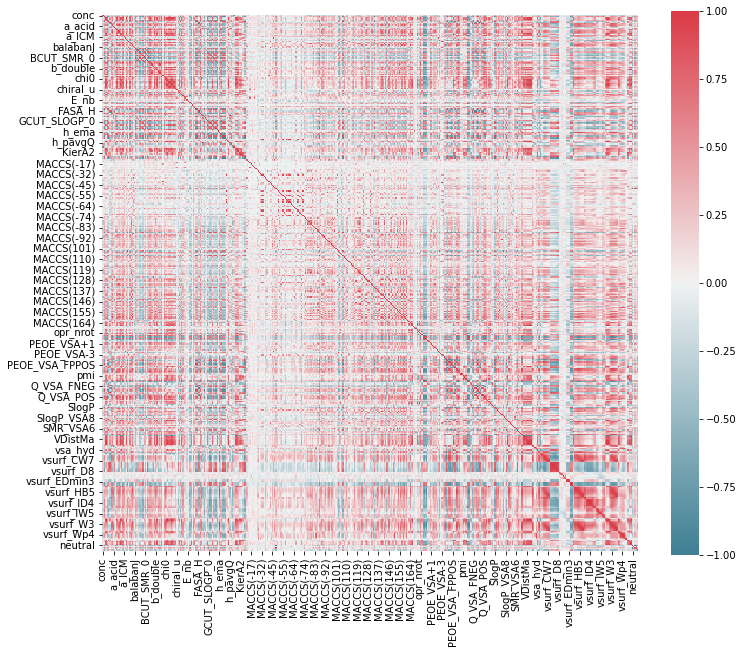

In [24]:
# function to create correlation matrix plot using Pearson Correlation
def corr_matrix_plot(df):
    f, ax = plt.subplots(figsize=(12, 10))
    corr = df.corr()
    sns.heatmap(corr, mask=np.zeros_like(corr),
                cmap=sns.diverging_palette(220, 10, as_cmap=True),
                square=True, ax=ax)
    #return(f)

corr_matrix_plot(df3)


In [25]:
#Corr_list_to_drop fuction returns a correlation matrix list between features, to drop
def Corr_list_to_drop(X, corr_poucent=0.8):
    corr_matrix = X.corr().abs()  #Calculate the absolute value element-wise
    high_corr_var=np.where(corr_matrix>corr_poucent)
    high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
    #Selecting the Upper trigular matrix
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
    
    #select the columns having absolute correlation > 0.8
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > corr_poucent)]
    return to_drop

X_df3 = df3.drop(columns=['Log_MP_RATIO'])
to_drop = Corr_list_to_drop(X_df3)
print(len(to_drop) ,'Number of highly correlated descriptors to drop','\n', to_drop)

286 Number of highly correlated descriptors to drop 
 ['ASA', 'a_count', 'a_donacc', 'a_heavy', 'a_IC', 'a_nC', 'a_nH', 'a_nO', 'BCUT_PEOE_0', 'BCUT_PEOE_3', 'BCUT_SLOGP_0', 'BCUT_SLOGP_2', 'BCUT_SMR_0', 'BCUT_SMR_1', 'BCUT_SMR_2', 'BCUT_SMR_3', 'bpol', 'b_1rotR', 'b_ar', 'b_count', 'b_heavy', 'b_rotN', 'b_rotR', 'b_single', 'CASA+', 'chi0', 'chi0v', 'chi0v_C', 'chi0_C', 'chi1', 'chi1v', 'chi1v_C', 'chi1_C', 'DCASA', 'density', 'diameter', 'E_nb', 'E_sol', 'E_str', 'FASA+', 'FASA-', 'FASA_H', 'FASA_P', 'FCASA+', 'FCASA-', 'GCUT_PEOE_0', 'GCUT_PEOE_3', 'GCUT_SLOGP_0', 'GCUT_SLOGP_2', 'GCUT_SLOGP_3', 'GCUT_SMR_0', 'GCUT_SMR_1', 'GCUT_SMR_2', 'GCUT_SMR_3', 'h_ema', 'h_emd', 'h_emd_C', 'h_logD', 'h_logP', 'h_logS', 'h_log_pbo', 'h_mr', 'h_pavgQ', 'h_pstates', 'h_pstrain', 'Kier1', 'Kier2', 'Kier3', 'KierA1', 'KierA2', 'KierA3', 'KierFlex', 'logP(o/w)', 'logS', 'MACCS(-11)', 'MACCS(-16)', 'MACCS(-22)', 'MACCS(-32)', 'MACCS(-33)', 'MACCS(-36)', 'MACCS(-41)', 'MACCS(-42)', 'MACCS(-46)', 'MACC

In [26]:
#Drop marked features

df4 = df3.drop(to_drop, axis = 1)
df4.describe()

,conc,ENV_CHEM,apol,ASA+,ASA-,ASA_H,ASA_P,a_acc,a_acid,a_aro,...,vsurf_EDmin1,vsurf_ID1,vsurf_IW1,vsurf_IW6,vsurf_IW7,vsurf_IW8,vsurf_Wp7,TEST,group,Log_MP_RATIO
count,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,...,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,183.000000
mean,6.254863e-16,1.261893e-16,3.907014e-16,-1.638034e-16,-1.832171e-16,1.456030e-16,7.765494e-17,-1.492431e-16,-2.378183e-16,2.014175e-16,...,-5.199241e-16,-6.188128e-17,-3.640075e-18,5.824121e-17,-1.941374e-16,-1.213358e-16,7.856496e-17,-1.092023e-17,-1.079889e-16,0.064355
std,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,...,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,0.646852
min,-4.450993e+00,-1.241639e+00,-2.370599e+00,-1.639861e+00,-1.656883e+00,-3.000074e+00,-1.003090e+00,-7.718496e-01,-3.920172e-01,-2.117154e+00,...,-2.423432e+00,-1.165232e+00,-1.199110e+00,-9.928166e-01,-8.262145e-01,-6.521861e-01,-2.269711e-01,-4.948717e-01,-9.391659e-01,-2.259637
25%,2.157379e-01,-1.241639e+00,-5.281113e-01,-9.432039e-01,-8.046056e-01,-6.703424e-01,-1.003090e+00,-7.718496e-01,-3.920172e-01,-7.065744e-01,...,-6.613750e-01,-9.160803e-01,-8.258797e-01,-9.928166e-01,-8.262145e-01,-6.521861e-01,-2.269711e-01,-4.948717e-01,-9.391659e-01,-0.244192
50%,4.729497e-01,8.053873e-01,-2.186841e-01,2.886218e-02,-2.688600e-01,2.471152e-01,-1.151957e-01,-2.881219e-01,-3.920172e-01,7.040051e-01,...,-2.530668e-02,-2.432954e-01,-2.993754e-01,-9.548340e-02,-8.262145e-01,-6.521861e-01,-2.269711e-01,-4.948717e-01,6.521986e-01,0.096618
75%,4.942501e-01,8.053873e-01,4.506123e-01,7.984577e-01,8.320257e-01,7.146181e-01,3.830576e-01,1.956057e-01,-3.920172e-01,7.040051e-01,...,5.662110e-01,6.758937e-01,6.269987e-01,8.369307e-01,8.439472e-01,8.481993e-01,-2.269711e-01,-4.948717e-01,6.521986e-01,0.561488
max,4.942501e-01,8.053873e-01,5.654735e+00,3.732230e+00,2.848557e+00,2.391566e+00,3.464480e+00,5.516610e+00,4.555510e+00,1.879488e+00,...,4.163175e+00,3.286429e+00,2.922094e+00,2.656283e+00,3.300092e+00,2.625921e+00,1.187398e+01,2.020726e+00,2.243563e+00,1.311038


In [27]:
df4

,conc,ENV_CHEM,apol,ASA+,ASA-,ASA_H,ASA_P,a_acc,a_acid,a_aro,...,vsurf_EDmin1,vsurf_ID1,vsurf_IW1,vsurf_IW6,vsurf_IW7,vsurf_IW8,vsurf_Wp7,TEST,group,Log_MP_RATIO
index,,,,,,,,,,,,,,,,,,,,,
1,0.465633,0.805387,-1.384821,-0.313757,-1.007823,-1.224640,-0.084355,0.195606,-0.392017,-0.706574,...,1.491412,-0.173962,-0.219531,0.412165,-0.826215,-0.652186,-0.226971,-0.494872,-0.939166,-0.119186
2,-0.734999,0.805387,-0.939346,0.506408,-1.259266,-1.633506,1.217306,1.646789,-0.392017,-0.941671,...,0.233054,-0.389234,-0.709978,0.260499,0.575940,0.586137,11.873983,-0.494872,-0.939166,0.423246
3,0.301070,0.805387,0.140849,0.041518,-0.059331,0.255527,-0.341123,0.679333,-0.392017,1.879488,...,-2.390261,0.900260,1.690733,1.443957,1.229828,-0.652186,-0.226971,-0.494872,-0.939166,-0.443698
4,0.464808,0.805387,-1.146940,-0.002819,-1.312852,-1.036761,-0.239164,-0.771850,-0.392017,-0.706574,...,1.546243,0.618029,0.823982,-0.992817,-0.826215,-0.652186,-0.226971,-0.494872,0.652199,0.711807
5,-1.332866,0.805387,0.440893,0.165890,-0.062957,-0.697547,1.255967,0.679333,2.081746,-0.706574,...,0.177947,1.754451,0.073165,0.376378,0.478904,1.013903,-0.226971,2.020726,2.243563,-0.530178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,-3.469375,0.805387,0.791622,1.155088,-0.447901,0.082529,0.912008,0.679333,-0.392017,0.704005,...,0.585608,1.888598,0.817875,0.782454,1.045082,1.947689,0.754187,-0.494872,0.652199,0.176091
180,0.494250,-1.241639,-0.106384,-0.678569,0.621579,-0.382537,0.234038,-0.771850,-0.392017,0.704005,...,-0.540235,-0.714127,-0.422650,-0.992817,-0.826215,-0.652186,-0.226971,-0.494872,-0.939166,0.472628
181,0.494250,-1.241639,-0.300426,-0.681108,0.691204,0.672012,-0.965153,-0.771850,-0.392017,0.704005,...,0.147427,-0.862815,-0.672649,-0.992817,-0.826215,-0.652186,-0.226971,-0.494872,-0.939166,0.667194


In [28]:
#save df4 to csv
df4ToCsv = df4.join(df_set)
df4ToCsv.to_csv('drop_correlated_features.csv', encoding='utf-8')

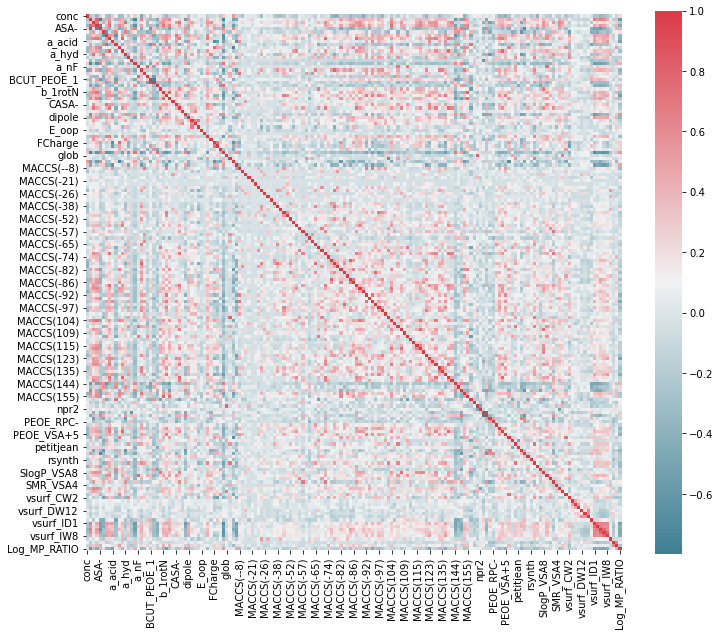

In [29]:
corr_matrix_plot(df4)

## 6. Keep relevant features correlated with output
    save the dataframe to df5 and csv : features_correlated_with_y.csv
    

In [30]:
#Corr_list_relevant_features fuction returns a correlation matrix list between features and output, to keep
def Corr_list_relevant_features(df, target=0.5):
    cor = df.corr()
    cor_target = abs(cor['Log_MP_RATIO'])
    #Selecting highly correlated features
    relevant_features = cor_target[cor_target>target]
    return relevant_features

relevant_features = Corr_list_relevant_features(df4)
print(len(relevant_features) ,'Number of descriptors correlated with y to keep','\n', relevant_features)

7 Number of descriptors correlated with y to keep 
 ENV_CHEM        0.582632
a_acid          0.500293
b_double        0.543089
DASA            0.547024
GCUT_SLOGP_1    0.538647
vsurf_ID1       0.503618
Log_MP_RATIO    1.000000
Name: Log_MP_RATIO, dtype: float64


In [31]:
#keep only relevant_features

to_keep = relevant_features.index

df5 = df4[to_keep]
df5

,ENV_CHEM,a_acid,b_double,DASA,GCUT_SLOGP_1,vsurf_ID1,Log_MP_RATIO
index,,,,,,,
1,0.805387,-0.392017,0.007686,-1.294161,-0.562670,-0.173962,-0.119186
2,0.805387,-0.392017,0.710981,-0.109509,-1.767129,-0.389234,0.423246
3,0.805387,-0.392017,0.007686,-1.577503,-0.263320,0.900260,-0.443698
4,0.805387,-0.392017,-0.695609,-0.642459,0.147892,0.618029,0.711807
5,0.805387,2.081746,1.414276,-1.656184,-1.176166,1.754451,-0.530178
...,...,...,...,...,...,...,...
179,0.805387,-0.392017,0.007686,-0.148477,-0.553115,1.888598,0.176091
180,-1.241639,-0.392017,-0.695609,-0.092884,0.268492,-0.714127,0.472628
181,-1.241639,-0.392017,0.007686,-0.022709,0.117520,-0.862815,0.667194


In [32]:
#save df5 to csv
df5ToCsv = df5.join(df_set)
df5ToCsv.to_csv('features_correlated_with_y.csv', encoding='utf-8')


## 7. Principal Component Analysis (PCA)
    on the scaled dataframe (df3) 
    save to df_pca.csv

In [33]:
scaled_X_df2

array([[ 0.46563257,  0.80538727, -1.38482144, ..., -0.49487166,
        -0.80538727, -0.93916594],
       [-0.73499915,  0.80538727, -0.93934616, ..., -0.49487166,
        -0.80538727, -0.93916594],
       [ 0.30107008,  0.80538727,  0.14084885, ..., -0.49487166,
        -0.80538727, -0.93916594],
       ...,
       [ 0.49425013, -1.2416387 , -0.30042618, ..., -0.49487166,
        -0.80538727, -0.93916594],
       [ 0.49425013, -1.2416387 , -0.10638446, ..., -0.49487166,
        -0.80538727, -0.93916594],
       [ 0.49425013, -1.2416387 , -0.17367151, ..., -0.49487166,
        -0.80538727, -0.93916594]])

In [34]:
from sklearn.decomposition import PCA
nComponents = 3
pca = PCA(n_components=nComponents)
pca.fit(scaled_X_df2)

PCA(n_components=3)

In [35]:
x_pca = pca.transform(scaled_X_df2)
print(scaled_X_df2.shape)
print(x_pca.shape)

(183, 454)
(183, 3)


In [36]:
columns = ['pca_%i' % i for i in range(1, (nComponents+1))]
df_pca = pd.DataFrame(x_pca, columns=columns, index=df2.index)
df_pca.head()

,pca_1,pca_2,pca_3
index,,,
1,-3.869440,-13.138409,-0.601571
2,12.198885,-15.179832,5.694123
3,-0.345607,-0.873442,0.785201
4,-4.167148,-12.438875,-8.899156
5,13.980586,-3.843984,7.718706


In [37]:
df_pca = df_pca.join(df_output)
df_pca

,pca_1,pca_2,pca_3,Log_MP_RATIO
index,,,,
1,-3.869440,-13.138409,-0.601571,-0.119186
2,12.198885,-15.179832,5.694123,0.423246
3,-0.345607,-0.873442,0.785201,-0.443698
4,-4.167148,-12.438875,-8.899156,0.711807
5,13.980586,-3.843984,7.718706,-0.530178
...,...,...,...,...
179,12.139736,0.937688,-4.787417,0.176091
180,-9.399453,2.679072,0.969435,0.472628
181,-10.510200,2.695000,0.298514,0.667194


In [38]:
#save df_pca to csv
df_pcaToCsv = df_pca.join(df_set)
df_pcaToCsv.to_csv('df_pca.csv', encoding='utf-8')

## 8. SelectKBest
    on the scaled dataframe (df3) - save to csv : df_SelectKBest.csv

In [39]:
X_df3 = df3.drop(columns=['Log_MP_RATIO'])
y = df['Log_MP_RATIO']
feature_selector = SelectKBest(f_regression, k = "all")
fit = feature_selector.fit(X_df3,y)

p_values = pd.DataFrame(fit.pvalues_)
scores = pd.DataFrame(fit.scores_)
input_variable_names = pd.DataFrame(X_df3.columns)
summary_stats = pd.concat([input_variable_names, p_values, scores], axis = 1)
summary_stats.columns = ["input_variable", "p_value", "f_score"]
summary_stats.sort_values(by = "p_value", inplace = True)

p_value_threshold = 0.05
score_threshold = 5

selected_variables = summary_stats.loc[(summary_stats["f_score"] >= score_threshold) &
                                       (summary_stats["p_value"] <= p_value_threshold)]
stat_significance = selected_variables
selected_variables = selected_variables["input_variable"].tolist()
X_df3_new = X_df3[selected_variables]
stat_significance

,input_variable,p_value,f_score
92,GCUT_SLOGP_2,2.441057e-19,102.254317
251,MACCS(154),4.520721e-19,100.350296
345,SMR_VSA0,5.269667e-19,99.878696
397,vsurf_EWmin1,1.354026e-18,96.993315
399,vsurf_EWmin3,2.029749e-18,95.764892
...,...,...,...
216,MACCS(119),1.821338e-02,5.678136
172,MACCS(-75),1.989229e-02,5.518743
211,MACCS(114),2.331742e-02,5.233123
357,VAdjEq,2.347378e-02,5.221152


In [40]:
X_df3_new = X_df3_new.join(df_output)
X_df3_new

,GCUT_SLOGP_2,MACCS(154),SMR_VSA0,vsurf_EWmin1,vsurf_EWmin3,vsurf_EWmin2,vsa_acc,ENV_CHEM,PEOE_VSA_FPNEG,PEOE_VSA_PNEG,...,MACCS(-24),MACCS(-77),BCUT_PEOE_1,SlogP_VSA5,MACCS(119),MACCS(-75),MACCS(114),VAdjEq,VDistMa,Log_MP_RATIO
index,,,,,,,,,,,,,,,,,,,,,
1,-0.687403,0.349138,-0.105379,0.075385,0.030602,0.068555,-0.094626,0.805387,0.854906,0.084470,...,-0.129099,-0.345986,-0.305803,-0.655781,-0.295493,-0.423337,-0.358379,1.948860,-1.828260,-0.119186
2,-1.027004,0.349138,0.154266,-1.381186,-1.538811,-1.463977,0.567452,0.805387,1.287014,0.714590,...,-0.129099,3.661318,0.391835,-0.134066,1.784321,1.038373,-0.358379,0.657593,-0.624164,0.423246
3,-0.547918,-0.649179,-0.668632,-0.340348,-0.326576,-0.351040,0.428477,0.805387,-0.618081,-0.586052,...,-0.129099,2.058396,-0.322409,-0.134066,1.784321,-0.423337,-0.358379,-0.272973,0.448514,-0.443698
4,-0.606131,-0.649179,-0.668632,0.787508,0.757671,0.768010,-0.742288,0.805387,-0.798898,-0.780435,...,-0.129099,-0.345986,0.414713,-0.069328,-0.295493,-0.423337,-0.358379,2.360217,-2.124668,0.711807
5,-0.749591,2.345773,2.028640,-1.259704,-1.282033,-1.255293,1.848359,0.805387,1.631557,1.765548,...,-0.129099,-0.345986,0.040814,-0.655781,-0.295493,-0.423337,-0.358379,-0.728865,0.666922,-0.530178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,-0.592030,0.349138,-0.105379,-1.117011,-1.048271,-1.051047,-0.094626,0.805387,0.468895,0.690991,...,-0.129099,-0.345986,0.071068,-0.069328,-0.295493,-0.423337,-0.358379,-0.855671,0.631089,0.176091
180,0.908113,-0.649179,-0.668632,1.310097,1.291265,1.301282,-0.742288,-1.241639,-0.887643,-0.827381,...,-0.129099,-0.345986,-0.560425,-0.655781,-0.295493,-0.423337,-0.358379,-0.023851,-0.019450,0.472628
181,0.588175,-0.649179,-0.668632,1.404430,1.409843,1.412805,-0.742288,-1.241639,-0.887643,-0.827381,...,-0.129099,-0.345986,-0.553488,-0.537186,-0.295493,-0.423337,-0.358379,0.184257,-0.220018,0.667194


In [41]:
#save X_df3_new to csv
X_df3_newToCsv = X_df3_new.join(df_set)
X_df3_newToCsv.to_csv('df_SelectKBest.csv', encoding='utf-8')

## 9. Find outliers 

In [42]:
#function to find outliers using IQR

def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [43]:
#find outliers in df
def df_listOutliers(df):
    listOutliers=[]
    for c in df.columns:
        if len(find_outliers_IQR(df[c]))>0:
            listOutliers.append((c,len(find_outliers_IQR(df[c]))))
    
    return len(listOutliers), listOutliers    

In [44]:
#find outliers in df3
df_listOutliers(df3)

(384,
 [('conc', 35),
  ('apol', 7),
  ('ASA', 12),
  ('ASA+', 1),
  ('ASA_H', 2),
  ('ASA_P', 6),
  ('a_acc', 8),
  ('a_acid', 26),
  ('a_base', 2),
  ('a_count', 3),
  ('a_don', 11),
  ('a_donacc', 3),
  ('a_heavy', 13),
  ('a_hyd', 6),
  ('a_IC', 3),
  ('a_ICM', 7),
  ('a_nBr', 13),
  ('a_nC', 8),
  ('a_nCl', 1),
  ('a_nF', 15),
  ('a_nH', 3),
  ('a_nN', 4),
  ('a_nO', 4),
  ('a_nS', 23),
  ('balabanJ', 7),
  ('BCUT_PEOE_1', 10),
  ('BCUT_PEOE_2', 19),
  ('BCUT_SLOGP_1', 4),
  ('BCUT_SLOGP_3', 7),
  ('BCUT_SMR_1', 10),
  ('BCUT_SMR_2', 3),
  ('BCUT_SMR_3', 1),
  ('bpol', 3),
  ('b_1rotN', 1),
  ('b_1rotR', 4),
  ('b_count', 3),
  ('b_double', 23),
  ('b_heavy', 11),
  ('b_max1len', 3),
  ('b_rotN', 3),
  ('b_rotR', 1),
  ('b_single', 3),
  ('b_triple', 4),
  ('CASA+', 6),
  ('CASA-', 18),
  ('chi0', 12),
  ('chi0v', 9),
  ('chi0v_C', 4),
  ('chi0_C', 4),
  ('chi1', 11),
  ('chi1v', 9),
  ('chi1v_C', 8),
  ('chi1_C', 3),
  ('chiral', 18),
  ('chiral_u', 37),
  ('DCASA', 8),
  ('densi

In [45]:
#find outliers in df4
df_listOutliers(df4)

(151,
 [('conc', 35),
  ('apol', 7),
  ('ASA+', 1),
  ('ASA_H', 2),
  ('ASA_P', 6),
  ('a_acc', 8),
  ('a_acid', 26),
  ('a_base', 2),
  ('a_don', 11),
  ('a_hyd', 6),
  ('a_ICM', 7),
  ('a_nBr', 13),
  ('a_nCl', 1),
  ('a_nF', 15),
  ('a_nN', 4),
  ('a_nS', 23),
  ('balabanJ', 7),
  ('BCUT_PEOE_1', 10),
  ('BCUT_PEOE_2', 19),
  ('BCUT_SLOGP_1', 4),
  ('BCUT_SLOGP_3', 7),
  ('b_1rotN', 1),
  ('b_double', 23),
  ('b_max1len', 3),
  ('b_triple', 4),
  ('CASA-', 18),
  ('chiral', 18),
  ('chiral_u', 37),
  ('dipole', 5),
  ('E', 13),
  ('E_ang', 9),
  ('E_ele', 37),
  ('E_oop', 48),
  ('E_strain', 27),
  ('E_tor', 8),
  ('E_vdw', 9),
  ('FCharge', 3),
  ('GCUT_PEOE_1', 10),
  ('GCUT_PEOE_2', 4),
  ('GCUT_SLOGP_1', 3),
  ('glob', 7),
  ('h_log_dbo', 7),
  ('MACCS(--8)', 8),
  ('MACCS(-13)', 1),
  ('MACCS(-17)', 1),
  ('MACCS(-19)', 18),
  ('MACCS(-21)', 1),
  ('MACCS(-23)', 1),
  ('MACCS(-24)', 3),
  ('MACCS(-25)', 6),
  ('MACCS(-26)', 4),
  ('MACCS(-28)', 5),
  ('MACCS(-34)', 1),
  ('MACC

In [46]:
#find outliers in df5
df_listOutliers(df5)

(5,
 [('a_acid', 26),
  ('b_double', 23),
  ('GCUT_SLOGP_1', 3),
  ('vsurf_ID1', 1),
  ('Log_MP_RATIO', 5)])

## 10. Data Visualization

In [47]:
def Data_Visualization(df):
    fig, axes = plt.subplots(2,2) 
    fig.set_size_inches(14,10)

    axes[0,0].hist(df['Log_MP_RATIO'], bins=30)
    axes[0,1].scatter(df.index, df['Log_MP_RATIO'])
    axes[1,0].boxplot(df['Log_MP_RATIO'], notch=True, patch_artist=True,
                     flierprops={'marker': 'o', 'markersize': 5, 'markerfacecolor': 'red'})
    sns.kdeplot(df['Log_MP_RATIO'], shade=True, thresh=0, ax=axes[1,1])
    plt.show()

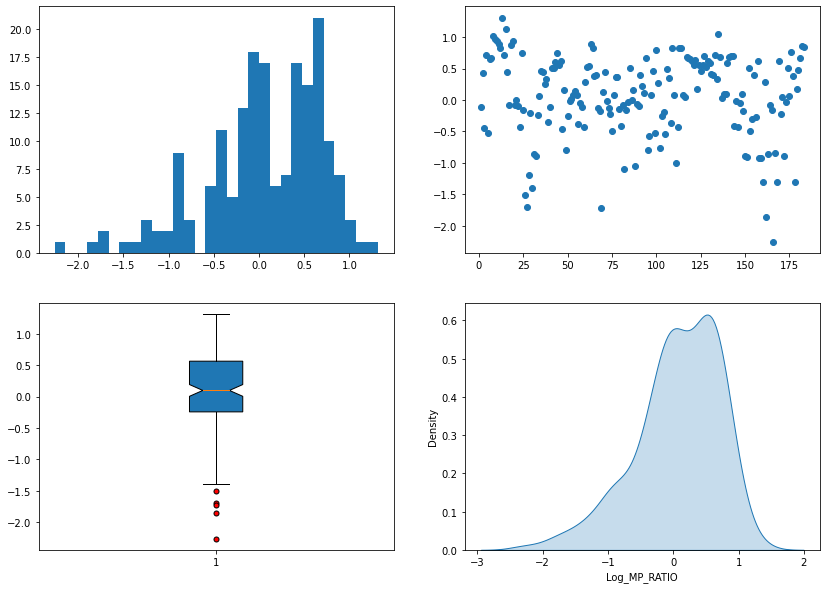

In [48]:
Data_Visualization(df3) # df3 scaled data